In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### 3rd Requirement

After re-analysing the dataset you found out that some investors have invested in the same startup at different number of funding rounds. So before finalising the previous list, you want to improvise it by finding the top 5 investors who have invested in different number of startups. This list will be more helpful than your previous list in finding the investment for your friend startup. Find the top 5 investors who have invested maximum number of times in different companies. That means, if one investor has invested multiple times in one startup, count one for that company. There are many errors in startup names. Ignore correcting all, just handle the important ones - Ola, Flipkart, Oyo and Paytm.

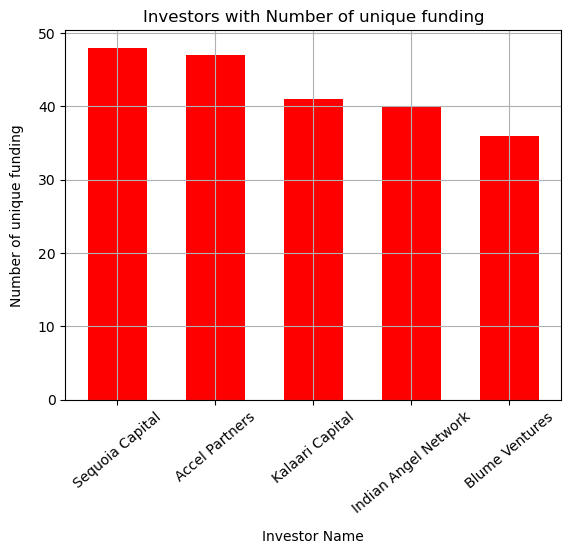

,top_investors,top_investors_investment_count
0,Sequoia Capital,48
1,Accel Partners,47
2,Kalaari Capital,41
3,Indian Angel Network,40
4,Blume Ventures,36


In [8]:
#Importing dataset
dataset = 'startup_funding.csv'
df = pd.read_csv(dataset)

#Removing NaN values
df.dropna(subset=['InvestorsName','StartupName'], inplace=True)

#Correcting important startup's name
df['StartupName'].replace('Flipkart.com', 'Flipkart',inplace=True)
df['StartupName'].replace('Paytm Marketplace', 'Paytm',inplace=True)
df['StartupName'].replace(to_replace =['Ola Cabs','Olacabs'], value='Ola',inplace=True)
df['StartupName'].replace(to_replace =['OYO Rooms','Oyo Rooms', 'OyoRooms', 'Oyorooms'], value ='Oyo',inplace=True)

#removing undiclosed investors
remove_value= ['Undisclosed Investors','Undisclosed investors','undisclosed investor', 'undisclosed investors']
df = df[df['InvestorsName'].isin(remove_value) == False]

#splitting the investors column values and storing it in a list
def separate(s):
    return s.strip().split(',')

df['InvestorsName'] = df['InvestorsName'].apply(separate)

#resetting the index
df.reset_index(inplace=True)

#selecting only data which requires analysis
df = df[['StartupName','InvestorsName']]

#dict for stroing investor name as key and startup name as values
dic = {}
for i in range(df.shape[0]):
    #getting the length of each list(whether there is only 1 investor or multiple)
    length = len(df['InvestorsName'][i])
    
    investor_name = df['InvestorsName'][i]
    startup_name = df['StartupName'][i].strip()
    
    #if only one investor then just get the name and create an entry in dict
    if length == 1:
        i_name = investor_name[0].strip()
        if dic.get(i_name) is None:
            s_list = []
            s_list.append(startup_name)
            dic[i_name] = s_list
        else:
            s_list = dic.get(i_name)
            if startup_name not in s_list:
                s_list.append(startup_name)
                dic[i_name] = s_list
    
    #if multiple investors split it into array and check individually same as above just with a for loop          
    else:
        for j in investor_name:
            i_name = j.strip()
            if i_name != '':
                if dic.get(i_name) is None:
                    s_list = []
                    s_list.append(startup_name)
                    dic[i_name] = s_list
                else:
                    s_list = dic.get(i_name)
                    if startup_name not in s_list:
                        s_list.append(startup_name)
                        dic[i_name] = s_list 

#counting the no. of startup an investor has invested in
investors_count = {}
for k,v in dic.items():
    if investors_count.get(k) is None:
        investors_count[k] = len(v)

#sorting the values so that we'd have top 5 investors
sorted_dict = {}
sorted_values = sorted(investors_count.values(), reverse=True)[:5]

for i in sorted_values:
    for k in investors_count.keys():
        if investors_count[k] == i:
            sorted_dict[k] = investors_count[k]
            break
            
top_investors = list(sorted_dict.keys())
top_investors_investment_count = list(sorted_dict.values())

#plotting graph
plt.bar(top_investors, top_investors_investment_count, width=0.6, color='red')
plt.xlabel('Investor Name',labelpad=10)
plt.xticks(rotation=40)
plt.ylabel('Number of unique funding',labelpad=10)
plt.title("Investors with Number of unique funding")
plt.grid()
plt.show()

#displaying data 
result_data = list(zip(top_investors, top_investors_investment_count))
final_df = pd.DataFrame(result_data, columns=['top_investors','top_investors_investment_count'])
final_df